# Evaluating Models

This code will implement two models.  The first is a simple regression model, we will show how to call the loss function, MSE during training, and output it after for test and training sets.

The second model will be a simple classification model.  We will also show how to print percent classified for both the test and training sets.

### Regression Model

For the regression model we will generate 100 random samples from a Normal(mean=1, sd=0.1).  The target will be an array of size 100 filled with the target value of 10.0.

We will fit the linear model $y=A \cdot x$ (no y intercept).  The theoretical value of `A` is `10.0`.

To start we load the necessary libraries and reset the computational graph.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

Start a graph session:

In [2]:
sess = tf.Session()

Declare the batch size:

In [3]:
batch_size = 25

### Generate Data for Regression

Here we generate the data required for the regression.  We also specify the necessary placeholders.

After we split the data into a 80-20 train-test split.

In [4]:
# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

### Model Variables and Operations

We create the model variable `A` and the multiplication operation.

In [5]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1,1]))

# Add operation to graph
my_output = tf.matmul(x_data, A)

### Loss, Optimization Function, and Variable Initialization

We use the L2 loss, and the standard Gradient Descent Optimization with a learning rate of 0.02.

In [6]:
# Add L2 loss operation to graph
loss = tf.reduce_mean(tf.square(my_output - y_target))

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

### Run Regression

We iterate 100 times through the training step, selecting a random batch of data each time.

In [7]:
# Run Loop
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))



Step #25 A = [[ 6.47693586]]
Loss = 12.0633
Step #50 A = [[ 8.68510914]]
Loss = 2.556
Step #75 A = [[ 9.50503254]]
Loss = 1.21711
Step #100 A = [[ 9.77385426]]
Loss = 1.04426


### Evaluation of Regression Model

For the regression model evaluation, we will run the loss wih the training and test set.

In [8]:
# Evaluate accuracy (loss) on test set
mse_test = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
mse_train = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
print('MSE on test:' + str(np.round(mse_test, 2)))
print('MSE on train:' + str(np.round(mse_train, 2)))

MSE on test:0.96
MSE on train:1.16


# Classification Example

For the classification example, we generate data as follows:

The input data will be a sample of size 50 from a Normal(mean = -1, sd = 1) and a sample of 50 from a Normal(mean = 1, sd = 1).

The target data will be 50 values of 0 and 50 values of 1.

We fit the binary classification model:

- If $sigmoid(x+A)<0.5$ Then we predict class 0
- If $sigmoid(x+A)>=0.5$ Then we predict class 1

Theoretically A should be

$$ - \frac{mean1 + mean2}{2} = 0$$

We start by resetting the computational graph:

In [1]:
ops.reset_default_graph()

NameError: name 'ops' is not defined

Create a graph session:

In [3]:
sess = tf.Session()

Declare the batch size:

In [4]:
batch_size = 25

### Generate Classification Data and Targets

We generate the classification data as described above.  Then we create the necessary placeholders.

After, we split the data in a 80-20 train-test split.

In [5]:
# Create data
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

### Model Variables and Operations

We create the model variable, `A`, and the model operation, which is the adding of `A` to the input data.  Note that we do not put the `sigmoid()` function in here because it will be included in the loss function.  This also means that for prediction, we will need to include the sigmoid function.

In [6]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

# Add operation to graph
# Want to create the operstion sigmoid(x + A)
# Note, the sigmoid() part is in the loss function
my_output = tf.add(x_data, A)

### Loss, Optimization Function, and Variable Initialization

The loss will be the sigmoid-cross-entropy.  We wrap that function in a `tf.reduce_mean()` so that we can reduce the sigmoid-cross-entropy over the whole batch.

The optimization function we use is again the standard Gradient Descent Optimization with a learning rate of 0.05.

In [8]:
# Add classification loss (cross entropy)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target))

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

### Run Classification

We iterate the classification training operation for 1800 iterations and print off the `A` values along with the loss every 200 iterations

In [10]:
# Run loop
for i in range(18000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%2000==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #2000 A = [-0.49595693]
Loss = 0.326879


Step #4000 A = [-0.52539617]
Loss = 0.258017


Step #6000 A = [-0.47863284]
Loss = 0.303386


Step #8000 A = [-0.51497865]
Loss = 0.301927


Step #10000 A = [-0.51471639]
Loss = 0.165261


Step #12000 A = [-0.53905213]
Loss = 0.220324


Step #14000 A = [-0.48589557]
Loss = 0.21062


Step #16000 A = [-0.49749666]
Loss = 0.257553


Step #18000 A = [-0.51881528]
Loss = 0.314755


### Evaluation of Classification Results

In [12]:
sess.run(A)

array([-0.51881528], dtype=float32)

Accuracy on train set: 0.925
Accuracy on test set: 0.95


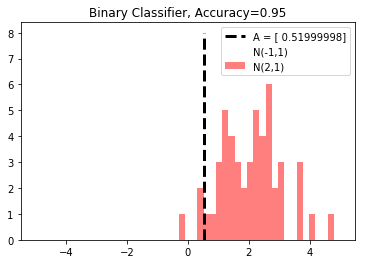

In [11]:
# Evaluate Predictions on test set
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

# Plot classification result
A_result = -sess.run(A)
bins = np.linspace(-5, 5, 50)
plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1,1)', color='white')
plt.hist(x_vals[50:100], bins[0:50], alpha=0.5, label='N(2,1)', color='red')
plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3, label='A = '+ str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_test, 2)))
plt.show()